In [35]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pylab import figure   
from pylab import rcParams
from xlrd import open_workbook
from itertools import cycle

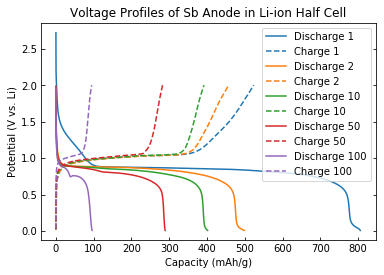

In [46]:
discharge_index = 2    #value determined by schedule file on the Arbin instrument
charge_index = 3       #value determined by schedule file on the Arbin instrument
mass = 0.00092         #mass of active material in grams

filename = 'Arbin_Cycling_Data.xlsx'
workbook = open_workbook(filename) 

all_data = pd.DataFrame()  

for sheet in range(1,workbook.nsheets-1):    
    data = pd.read_excel(filename, sheetname=sheet, 
            parse_cols='B,E,F,H,I,J', 
            names=['time','step','cycle','voltage','charge','discharge'])
    all_data = all_data.append(data)

data_by_cycle = all_data.groupby(['cycle','step']) 

for cycle in [1,2,10,50,100]: 
    
    discharge = data_by_cycle.get_group((cycle,discharge_index))['discharge']/mass*1000
    voltage = data_by_cycle.get_group((cycle,discharge_index))['voltage']
    p = plt.plot(discharge, voltage, label='Discharge '+str(cycle))

    charge = data_by_cycle.get_group((cycle,charge_index))['charge']/mass*1000
    voltage = data_by_cycle.get_group((cycle,charge_index))['voltage']
    plt.plot(charge, voltage, color = p[0].get_color(), linestyle='--', label='Charge '+str(cycle))
    
plt.xlabel('Capacity (mAh/g)')
plt.ylabel('Potential (V vs. Li)')
plt.tick_params(axis="x",direction="in")
plt.tick_params(axis="y",direction="in",right=True)
plt.title('Voltage Profiles of Sb Anode in Li-ion Half Cell')
plt.legend()
plt.show()